In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (Make sure the CSV file is in the same directory or provide full path)
df = pd.read_csv('diseases_.csv')
df.head()

,Date,Location,Disease Type,Total Cases,Total Deaths,Recovery Rate,Temperature,Humidity,Population Density,Travel Index,Health Infrastructure,Nearby Outbreaks (Yes/No)
0,1/1/2024,City A,Influenza,50,2,95,10,80,5000,3,7,Yes
1,1/2/2024,City A,Influenza,60,3,94,11,78,5000,3,7,Yes
2,1/3/2024,City B,Malaria,120,5,85,30,60,8000,5,5,No
3,1/4/2024,City B,Malaria,150,7,84,31,58,8000,5,5,No
4,1/5/2024,City C,COVID-19,500,10,90,25,75,15000,8,6,Yes


Accuracy: 0.56
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.43      0.60         7
           1       0.33      1.00      0.50         2

    accuracy                           0.56         9
   macro avg       0.67      0.71      0.55         9
weighted avg       0.85      0.56      0.58         9



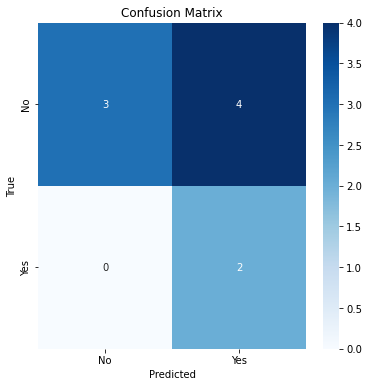

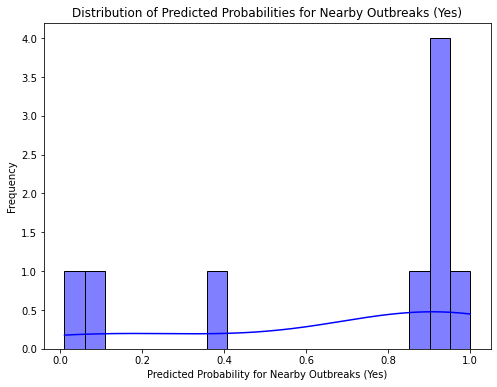

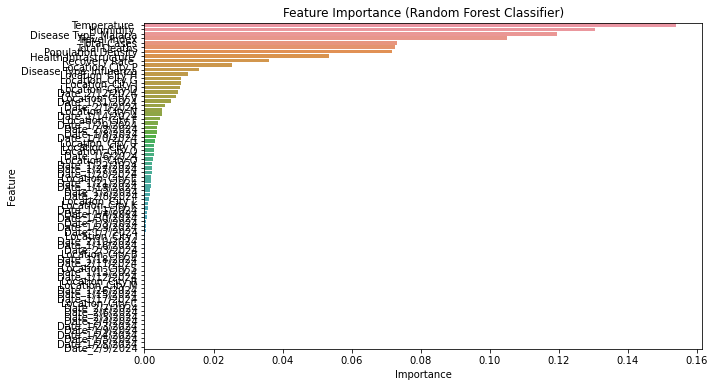

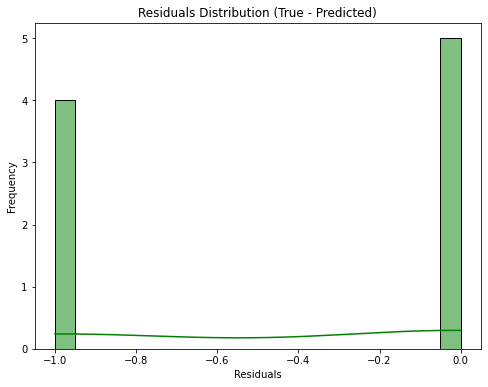

In [16]:
# Fill missing values (here we're filling with mode for categorical and mean for numerical)
df.fillna(df.select_dtypes(include=[float, int]).mean(), inplace=True)
df.fillna(df.select_dtypes(include=[object]).mode().iloc[0], inplace=True)

# Convert 'Nearby Outbreaks' to binary (Yes -> 1, No -> 0) if it's a categorical column
df['Nearby Outbreaks (Yes/No)'] = df['Nearby Outbreaks (Yes/No)'].map({'Yes': 1, 'No': 0})

# One-hot encode categorical variables (like 'City' if present)
df = pd.get_dummies(df, drop_first=True)

# Define features (X) and target (y)
X = df.drop('Nearby Outbreaks (Yes/No)', axis=1)  # Features (all columns except target)
y = df['Nearby Outbreaks (Yes/No)']  # Target variable (whether there's an outbreak nearby)

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# ====== Additional Visualizations ======

# 1. Plot distribution of predicted probabilities for 'Yes' (Nearby Outbreak = 1)
y_pred_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for class '1' (Nearby Outbreak = Yes)

plt.figure(figsize=(8, 6))
sns.histplot(y_pred_prob, kde=True, bins=20, color='blue')
plt.title('Distribution of Predicted Probabilities for Nearby Outbreaks (Yes)')
plt.xlabel('Predicted Probability for Nearby Outbreaks (Yes)')
plt.ylabel('Frequency')
plt.show()

# 2. Feature Importance (Using Random Forest)
feature_importances = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance (Random Forest Classifier)')
plt.show()

# 3. Residual Analysis (Difference between True and Predicted Values)
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=20, color='green')
plt.title('Residuals Distribution (True - Predicted)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()
